In [1]:
!git clone https://github.com/NataliaVrabcova/assessment-1-neural-networks

Cloning into 'assessment-1-neural-networks'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 27 (delta 12), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.01 MiB | 2.69 MiB/s, done.
Resolving deltas: 100% (12/12), done.


In [2]:
import pandas as pd

# Adjust the path to match your repository structure
data = pd.read_csv('/content/assessment-1-neural-networks/healthcare_noshows_appointments.csv')

# Verify the dataset is loaded
print(data.head())

      PatientId  AppointmentID Gender ScheduledDay AppointmentDay  Age  \
0  2.987250e+13        5642903      F   2016-04-29     2016-04-29   62   
1  5.589978e+14        5642503      M   2016-04-29     2016-04-29   56   
2  4.262962e+12        5642549      F   2016-04-29     2016-04-29   62   
3  8.679512e+11        5642828      F   2016-04-29     2016-04-29    8   
4  8.841186e+12        5642494      F   2016-04-29     2016-04-29   56   

       Neighbourhood  Scholarship  Hipertension  Diabetes  Alcoholism  \
0    JARDIM DA PENHA        False          True     False       False   
1    JARDIM DA PENHA        False         False     False       False   
2      MATA DA PRAIA        False         False     False       False   
3  PONTAL DE CAMBURI        False         False     False       False   
4    JARDIM DA PENHA        False          True      True       False   

   Handcap  SMS_received  Showed_up  Date.diff  
0    False         False       True          0  
1    False        

In [3]:
# Importing libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

Preprocessing the Data

In [4]:
# Selecting features and target variable
X = data.drop(['Showed_up', 'PatientId', 'AppointmentID'], axis=1)
y = data['Showed_up']

# Encoding categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Feature Selection: Excludes columns not needed for model training, such as IDs and the target variable itself.
Categorical Encoding: Converts categorical data into a numerical format suitable for neural network training.
Data Splitting: Divides the data into training and testing sets to validate the model’s performance.
Feature Scaling: Normalizes the data to ensure that all features contribute equally to the learning process.

Defining the architecture of the neural network:

In [5]:
# Defining the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

Input Layer: Defines the input shape based on the number of features after
preprocessing.

Hidden Layers: Uses ReLU activation for hidden layers (64 and 32 neurons), This is common for capturing complex patterns.

Dropout: Helps prevent overfitting by randomly setting some of the input units to zero at each update during training.

Output Layer: A sigmoid activation function is appropriate for binary classification tasks (showed up or not).

**The Adam** optimizer was chosen due to its adaptability and efficiency in handling sparse gradients. The default learning rate of 0.001 was used, as it generally works well for a wide range of tasks and often provides a good starting point for optimization. This ensures stable and efficient convergence without the need for extensive fine-tuning.

Train the model with your preprocessed data:

In [6]:
# Train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.7475 - loss: 0.6035 - val_accuracy: 0.7979 - val_loss: 0.4706
Epoch 2/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7978 - loss: 0.4735 - val_accuracy: 0.7979 - val_loss: 0.4601
Epoch 3/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.7961 - loss: 0.4640 - val_accuracy: 0.7979 - val_loss: 0.4553
Epoch 4/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7980 - loss: 0.4569 - val_accuracy: 0.7979 - val_loss: 0.4544
Epoch 5/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7940 - loss: 0.4591 - val_accuracy: 0.7979 - val_loss: 0.4534
Epoch 6/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7960 - loss: 0.4553 - val_accuracy: 0.7979 - val_loss: 0.4515
Epoch 7/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7946 - loss: 0.4539 - val_accuracy: 0.7980 - val_loss: 0.4515
Epoch 8/25
2675/2675 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7991 - loss: 0.4475 

Epochs: Set to 25 to allow the model to train over multiple iterations, capturing different patterns in the data. This number was selected to allow the model sufficient iterations to learn patterns in the data while avoiding overfitting. Early stopping techniques could be employed in future experiments to determine the optimal number of epochs dynamically based on validation performance.

Batch Size: Smaller batch sizes can help with faster convergence, while larger sizes provide more accurate updates. The choice of 32 as a batch size is a commonly used standard that balances the trade-offs between computational efficiency, convergence speed, and model performance.
Validation Data: Monitors the model’s performance on a holdout set to prevent overfitting.

Evaluate the model’s performance:

In [7]:
# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Accuracy: 0.7987


Accuracy Calculation: Measures the proportion of correct predictions on the test set. A higher accuracy indicates a better-performing model.

Evaluate the model on the test set

In [8]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7970 - loss: 0.4489


Test Loss:
  This value indicates the average error (or loss) of the model when it made predictions on the test data. A lower loss generally means that the model made fewer mistakes.

Test Accuracy:
  This metric shows the proportion of correct predictions (true positives + true negatives) out of the total predictions on the test set. A value closer to 1 indicates better performance.



**Backpropagation:**

This segment provides a step-by-step view of how the neural network processes data and adjusts its parameters during training. It helps to understand the underlying mechanism of how neural networks learn from data.

In [ ]:
import numpy as np

# Given parameters
X = np.random.rand(100, 14)  # Example data (100 samples, 14 features)
W1 = np.random.rand(14, 64)  # Weights for first hidden layer (14 input features, 64 neurons)
b1 = np.random.rand(1, 64)   # Bias for first hidden layer (64 neurons)
learning_rate = 0.01


# Forward Propagation for the first hidden layer
Z1 = np.dot(X, W1) + b1  # Linear transformation
A1 = np.maximum(0, Z1)   # ReLU activation

# Assuming we have a loss gradient with respect to A1
dA1 = np.random.rand(100, 64)  # Gradient of loss with respect to A1

# Backward Propagation for the first hidden layer
dZ1 = dA1 * (Z1 > 0)  # Derivative of ReLU
dW1 = np.dot(X.T, dZ1)  # Gradient of loss with respect to W1
db1 = np.sum(dZ1, axis=0, keepdims=True)  # Gradient of loss with respect to b1

# Update weights and biases
W1 -= learning_rate * dW1
b1 -= learning_rate * db1

print("Updated Weights:", W1)
print("Updated Biases:", b1)

  Forward Propagation:
  
        The input X is multiplied by the weight matrix W and added to the bias b to get Z1.
        The ReLU activation function then applies A1 = max(0, Z1).

  Backward Propagation:

        We compute the gradient of the loss with respect to A1 which is then used to calculate gradients for Z1.
        These gradients are used to update the weights W1 and biases b1 using gradient descent.

This approach provides a clear view of how the data propagates through the network and how the weights and biases are adjusted during training. This can be directly related to your dataset and network configuration.

After the backpropagation step, it appears that the updated weights have undergone significant changes, reflecting the adjustments made to minimize the loss during training. These changes are a positive sign that the model is learning from the data and refining its predictions. The weights have likely been updated to better capture the relationships within the dataset, which should enhance the model's performance.

Monitoring the loss and validation accuracy will provide a clearer picture of how well the model is performing following these updates. If the loss is decreasing steadily, it indicates that the model is making progress towards convergence.

Model Performance:
 **Metrics**: We evaluate the model using several key metrics relevant to binary classification tasks:

In [12]:

# Make predictions
predictions = model.predict(X_test)  # Predictions from the neural network

# Convert predictions to binary values
predictions = (predictions > 0.5).astype(int)  # Convert probabilities to 0 or 1

# Actual values (target variable)
true_values = y_test

# Calculate confusion matrix
cm = confusion_matrix(true_values, predictions)

# Extract the values
TP = cm[1, 1]  # True Positives
TN = cm[0, 0]  # True Negatives
FP = cm[0, 1]  # False Positives
FN = cm[1, 0]  # False Negatives

print(f'True Positives: {TP}')
print(f'True Negatives: {TN}')
print(f'False Positives: {FP}')
print(f'False Negatives: {FN}')

# Calculate other metrics
accuracy = accuracy_score(true_values, predictions)
precision = precision_score(true_values, predictions)
recall = recall_score(true_values, predictions)
f1 = f1_score(true_values, predictions)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

669/669 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
True Positives: 17039
True Negatives: 51
False Positives: 4274
False Negatives: 34
Accuracy: 0.7986727731563698
Precision: 0.7994651151879135
Recall: 0.9980085515140865
F1 Score: 0.8877715833897776


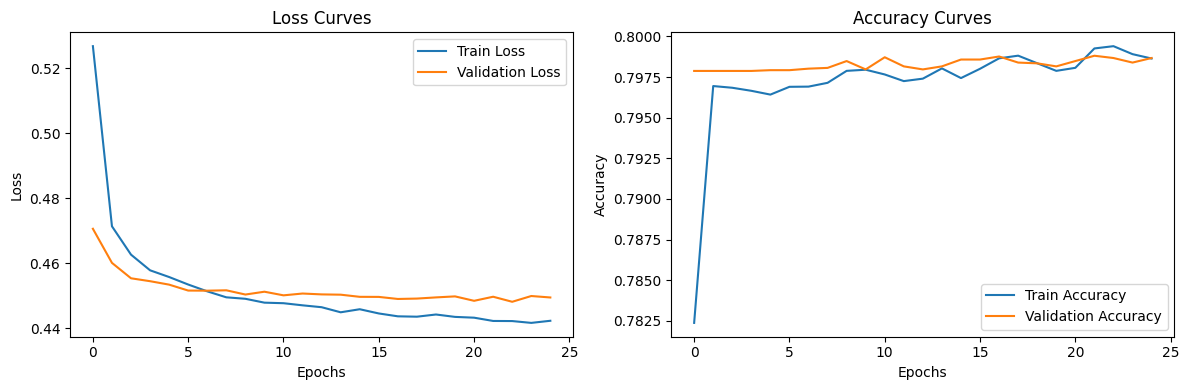

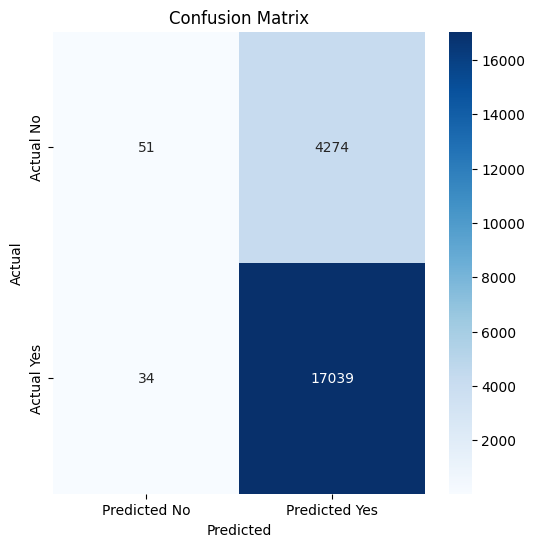

In [11]:
# Plotting loss curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curves')

# Plotting accuracy curves
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curves')

plt.tight_layout()
plt.show()

# Plotting confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted No', 'Predicted Yes'], yticklabels=['Actual No', 'Actual Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Loss Curves: The loss curves plot the training and validation loss across epochs, allowing you to visualize overfitting or underfitting. The left plot shows the loss over epochs, while the right plot shows the accuracy over epochs.


Confusion Matrix: The confusion matrix is plotted as a heatmap to visually inspect the performance of the classification model. It shows True Positives, True Negatives, False Positives, and False Negatives.

Confusion Matrix: The matrix displays the counts of true positives, true negatives, false positives, and false negatives. The numbers are represented in blue, with darker blue shades indicating higher values.